In [234]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [235]:
backtester = Backtester(datetime(2020, 4, 1, 0, 0, 0))

In [236]:
LONG_FACTOR_CANDIDATES = [
#     "VLUE", # Value.
#     "USMV", # Low volatility.
#     "SDY", # Dividend.
    "VXX"
]
SHORT_FACTOR_CANDIDATES = [
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
]
LONG_CANDIDATES = [
    "AMZN",
    "BABA",
    "BLK",
    "CRM",
    "DDOG",
    "FDX",
    "FIVN",
    "LULU",
    "NVDA",
    "PBW",
    "PINS",
    "PTON",
    "RH",
    "SNAP",
    "SE",
    "SQ",
    "TTD",
    "TWLO",
    "TSLA",
    "UPS",
    "ZG",
    "ARKK",
] + LONG_FACTOR_CANDIDATES
SHORT_CANDIDATES = [
    "VRSN",
    "CSCO",
    "IBM",
    "BOX",
    "CLDR",
    "EQR",
    "NEWR",
    "VMW",
] + SHORT_FACTOR_CANDIDATES
r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

[*********************100%***********************]  35 of 35 completed


In [237]:
print("LONG FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(LONG_CANDIDATES))
print()
print("SHORT FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(SHORT_CANDIDATES))

LONG FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=AMZN,BABA,BLK,CRM,DDOG,FDX,FIVN,LULU,NVDA,PBW,PINS,PTON,RH,SNAP,SE,SQ,TTD,TWLO,TSLA,UPS,ZG,ARKK,VXX

SHORT FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=VRSN,CSCO,IBM,BOX,CLDR,EQR,NEWR,VMW,SPY,IWF,IWM,MTUM


In [238]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


long_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in LONG_CANDIDATES]]
for (k, v) in long_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)
    
short_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in SHORT_CANDIDATES]]
for (k, v) in short_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=3, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)
fig.show()

# Proposed Allocation

## Sorted A-Z

In [239]:
import plotly.express as px
data = r.allocation_history.iloc[-1]
px.bar(x=data.index, y=data)

## Sorted by weight

In [240]:
data[data!=0].count()

34

In [241]:
print(data[data!=0].sort_values())

MTUM   -0.206361
IWF    -0.201220
SPY    -0.153947
VRSN   -0.131682
IWM    -0.119147
VMW    -0.088701
BOX    -0.063334
CLDR   -0.054623
EQR    -0.044914
NEWR   -0.031359
CSCO   -0.020566
IBM    -0.008796
ZG      0.005333
PTON    0.009773
TSLA    0.010113
TTD     0.011473
VXX     0.012832
SE      0.014660
DDOG    0.015106
PINS    0.016381
TWLO    0.020162
RH      0.024581
FIVN    0.033717
BABA    0.039624
SNAP    0.055409
CRM     0.056132
ARKK    0.058384
LULU    0.065862
PBW     0.069007
UPS     0.071514
NVDA    0.086619
FDX     0.089084
AMZN    0.091612
BLK     0.142623
Name: 2020-10-22 00:00:00, dtype: float64


Start date,2020-04-01
End date,2020-10-22
Total months,6
,Backtest
Annual return,144.141%
Cumulative returns,65.948%
Annual volatility,11.255%
Sharpe ratio,8.00
Calmar ratio,74.80
Stability,0.99
Max drawdown,-1.927%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1.93,2020-06-24,2020-06-26,2020-07-01,6
1,1.74,2020-10-07,2020-10-12,2020-10-14,6
2,1.46,2020-05-21,2020-05-29,2020-06-02,9
3,1.11,2020-04-01,2020-04-03,2020-04-07,5
4,1.00,2020-04-27,2020-04-28,2020-05-13,13


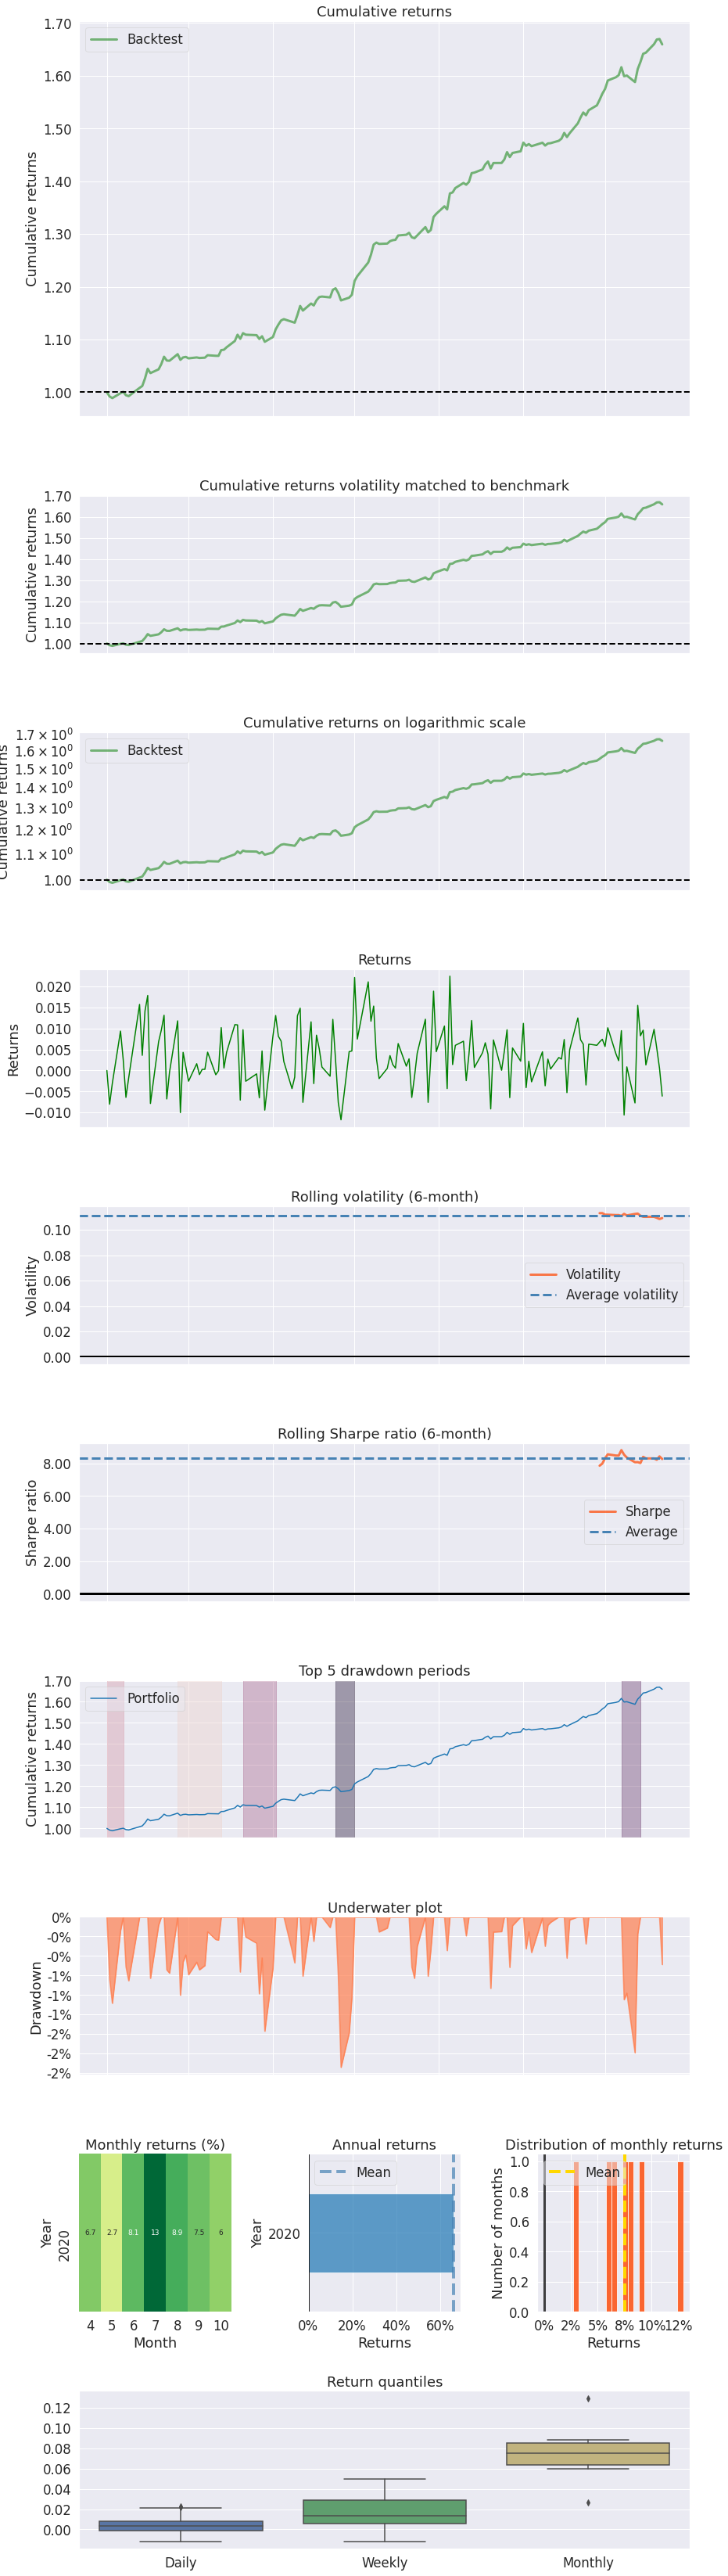

In [242]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [243]:
if True:
    r.save_most_recent_allocation("./allocations/", leverage=1.5)